In [1]:
#methods and code inspired by Rob Mulla: https://www.kaggle.com/code/robikscube/time-series-forecasting-with-machine-learning-yt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
# Read the CSV file
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory = False)

df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [2]:
df['Sub_metering_1'] = df['Sub_metering_1'].replace('?', np.nan)
df['Sub_metering_2'] = df['Sub_metering_2'].replace('?', np.nan)
df['Global_active_power'] = df['Global_active_power'].replace('?', np.nan)
df['Global_reactive_power'] = df['Global_reactive_power'].replace('?', np.nan)
df['Voltage'] = df['Voltage'].replace('?', np.nan)
df['Global_intensity'] = df['Global_intensity'].replace('?', np.nan)
# Then convert the column to 'float64'
df['Sub_metering_1'] = df['Sub_metering_1'].astype('float64')
df['Sub_metering_2'] = df['Sub_metering_2'].astype('float64')
df['Global_active_power'] = df['Global_active_power'].astype('float64')
df['Global_reactive_power'] = df['Global_reactive_power'].astype('float64')
df['Voltage'] = df['Voltage'].astype('float64')
df['Global_intensity'] = df['Global_intensity'].astype('float64')

In [3]:
df['Total_Usage'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Total_Usage              float64
dtype: object

In [4]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Time' column to timedelta
df['Time'] = pd.to_timedelta(df['Time'])

# Create a new column by combining 'Date' and 'Time'
df['DateTime'] = df['Date'] + df['Time']

# Convert the new column to datetime64 data type
df['DateTime'] = pd.to_datetime(df['DateTime'], dayfirst= True)

In [5]:
df = df[(df['Date'] >= '01/01/2007') & (df['Date'] <= '31/12/2009')]
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Usage,DateTime
21996,2007-01-01,0 days 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,0.0,2007-01-01 00:00:00
21997,2007-01-01,0 days 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,0.0,2007-01-01 00:01:00
21998,2007-01-01,0 days 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,0.0,2007-01-01 00:02:00
21999,2007-01-01,0 days 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,0.0,2007-01-01 00:03:00
22000,2007-01-01,0 days 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,0.0,2007-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...
1600231,2009-12-31,0 days 23:55:00,1.746,0.158,239.95,7.2,0.0,0.0,18.0,18.0,2009-12-31 23:55:00
1600232,2009-12-31,0 days 23:56:00,1.786,0.234,240.09,7.4,0.0,0.0,19.0,19.0,2009-12-31 23:56:00
1600233,2009-12-31,0 days 23:57:00,1.784,0.232,239.99,7.4,0.0,0.0,18.0,18.0,2009-12-31 23:57:00
1600234,2009-12-31,0 days 23:58:00,1.792,0.236,240.62,7.4,0.0,0.0,18.0,18.0,2009-12-31 23:58:00


In [6]:
# Set the 'timestamp' column as the index
df.set_index('DateTime', inplace=True)
# Resample the dataframe to daily frequency and sum the values
df = df.resample('H').sum()

# Reset the index to have the date as a column
df = df.reset_index()
# Print the resulting dataframe
df

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Usage
0,2007-01-01 00:00:00,153.038,6.768,14481.68,631.8,0.0,35.0,0.0,35.0
1,2007-01-01 01:00:00,151.404,4.298,14465.79,626.6,0.0,0.0,0.0,0.0
2,2007-01-01 02:00:00,154.940,6.400,14592.01,632.4,0.0,20.0,0.0,20.0
3,2007-01-01 03:00:00,152.500,5.406,14595.94,624.0,0.0,16.0,0.0,16.0
4,2007-01-01 04:00:00,148.544,5.290,14547.37,606.6,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
26299,2009-12-31 19:00:00,183.772,11.218,14234.90,770.8,0.0,7.0,1074.0,1081.0
26300,2009-12-31 20:00:00,170.550,9.526,14267.67,714.0,0.0,0.0,1078.0,1078.0
26301,2009-12-31 21:00:00,172.522,12.936,14198.49,726.0,0.0,21.0,1123.0,1144.0
26302,2009-12-31 22:00:00,122.062,8.088,14274.83,511.2,0.0,32.0,1079.0,1111.0


In [7]:
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)
columns_to_drop = [
    'Global_active_power', 'Global_reactive_power',
    'Voltage', 'Global_intensity', 'Sub_metering_1',
    'Sub_metering_2', 'Sub_metering_3'
]
df = df.drop(columns=columns_to_drop)

df

,Total_Usage
DateTime,
2007-01-01 00:00:00,35.0
2007-01-01 01:00:00,0.0
2007-01-01 02:00:00,20.0
2007-01-01 03:00:00,16.0
2007-01-01 04:00:00,0.0
...,...
2009-12-31 19:00:00,1081.0
2009-12-31 20:00:00,1078.0
2009-12-31 21:00:00,1144.0


In [8]:
print(df.dtypes)

Total_Usage    float64
dtype: object


In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

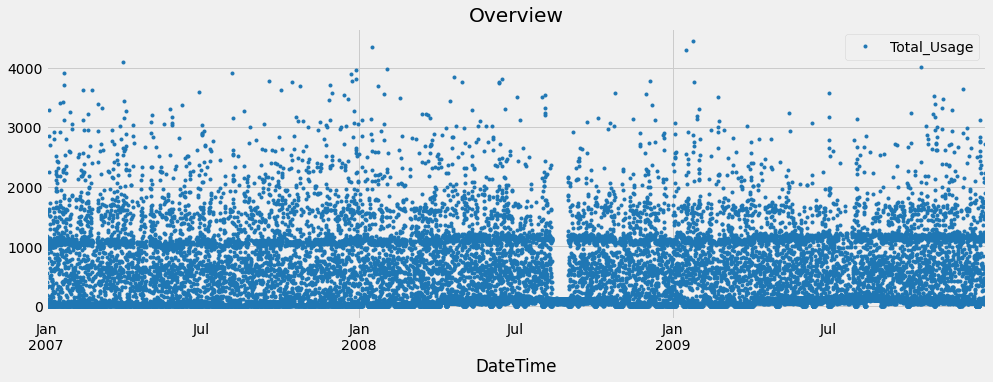

In [10]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Overview')
plt.show()

### First impression 
- at first glance, no clear trend can be identified. In order to decide whether and which algorithm to use, we have to create more plots, minimize the viewed period and look at it more closely.

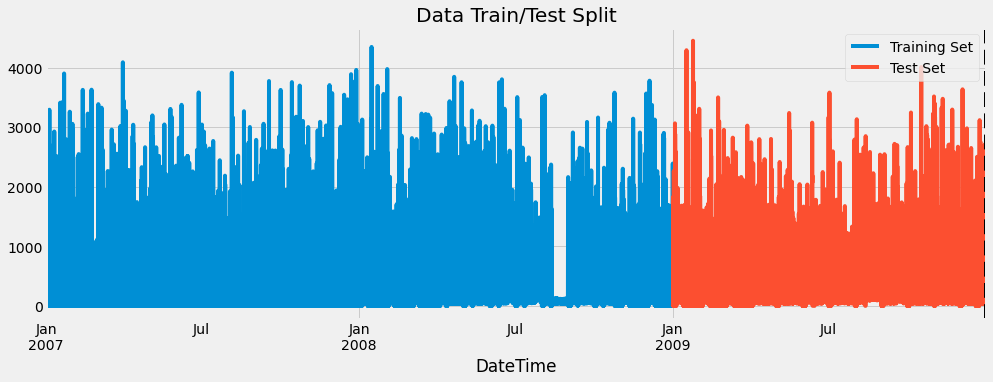

In [11]:
train = df.loc[df.index < '2009-01-01']
test = df.loc[df.index >= '2009-01-01']	

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2010-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

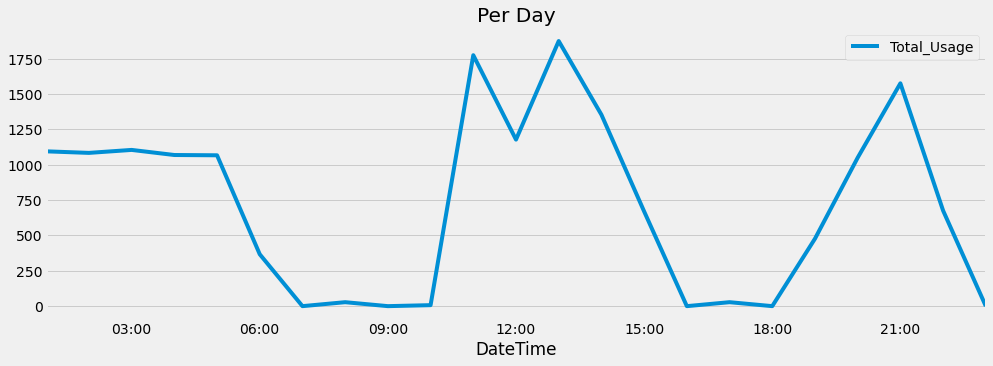

In [12]:
df.loc[(df.index > '2008-01-01') & (df.index < '2008-01-02')] \
    .plot(figsize=(15, 5), title='Per Day')
plt.show()

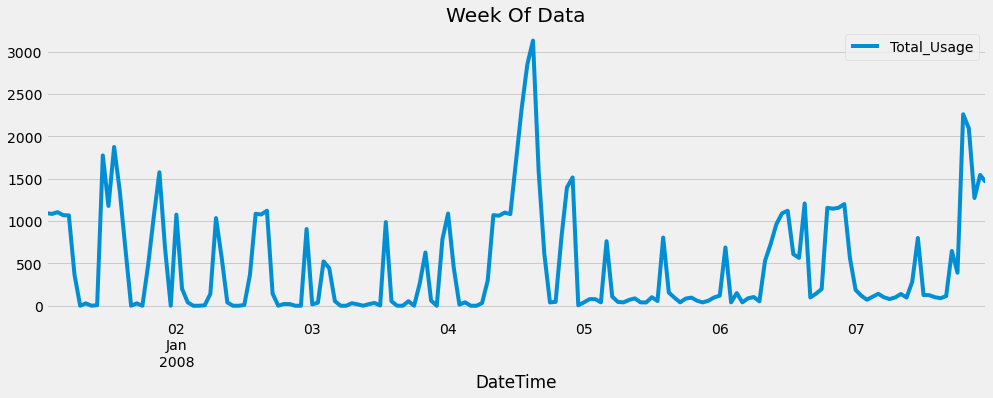

In [13]:
df.loc[(df.index > '2008-01-01') & (df.index < '2008-01-08')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [14]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)
df

,Total_Usage,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,
2007-01-01 00:00:00,35.0,0,0,1,1,2007,1,1,1
2007-01-01 01:00:00,0.0,1,0,1,1,2007,1,1,1
2007-01-01 02:00:00,20.0,2,0,1,1,2007,1,1,1
2007-01-01 03:00:00,16.0,3,0,1,1,2007,1,1,1
2007-01-01 04:00:00,0.0,4,0,1,1,2007,1,1,1
...,...,...,...,...,...,...,...,...,...
2009-12-31 19:00:00,1081.0,19,3,4,12,2009,365,31,53
2009-12-31 20:00:00,1078.0,20,3,4,12,2009,365,31,53
2009-12-31 21:00:00,1144.0,21,3,4,12,2009,365,31,53


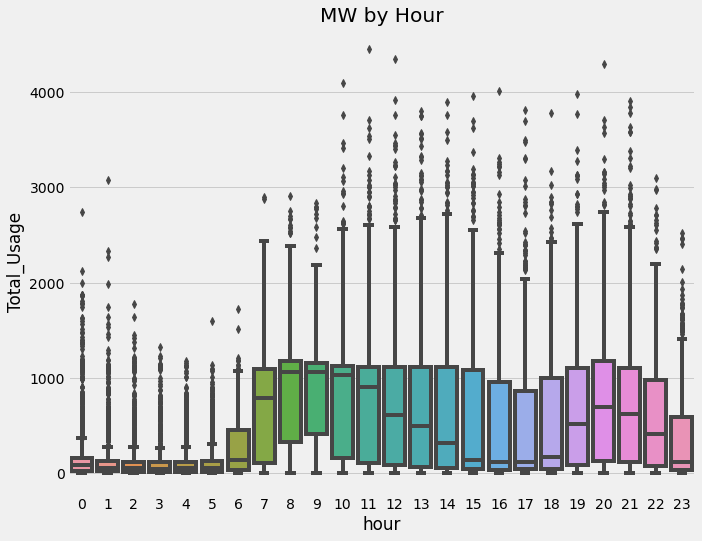

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='Total_Usage')
ax.set_title('MW by Hour')
plt.show()

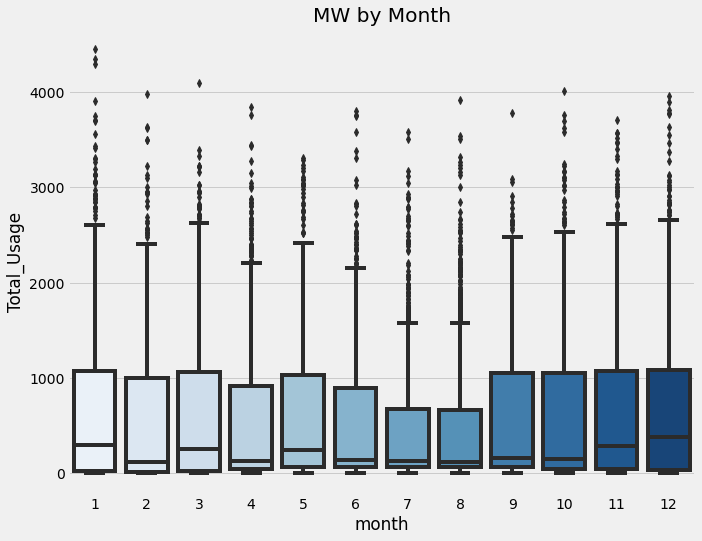

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Total_Usage', palette='Blues')
ax.set_title('MW by Month')
plt.show()

### Forecast Model
- for our ML regression task we use the XGBRegressor. It boost the tree and classifies the order of importance of each feature used for the prediction. 

- using max_depth, n_estimators and learning_rate mainly to improve prediction performance and amplitude

In [17]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'Total_Usage'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [18]:
reg = xgb.XGBRegressor(
    base_score=0.5,
    booster='gbtree',
    n_estimators=200000,
    early_stopping_rounds=50,
    objective='reg:linear',
    max_depth=15,  # Increase the maximum depth
    learning_rate=0.5,  # Increase the learning rate
    subsample=0.9,  # Increase the subsampling ratio
    colsample_bytree=0.8,
    reg_alpha=0.001,  # Adjust the regularization strength
    reg_lambda=0.001
)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100) #original

[16:59:43] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:622.99634	validation_1-rmse:619.35368
[51]	validation_0-rmse:72.26218	validation_1-rmse:672.31983


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

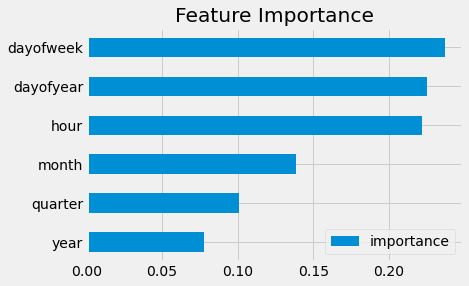

In [19]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

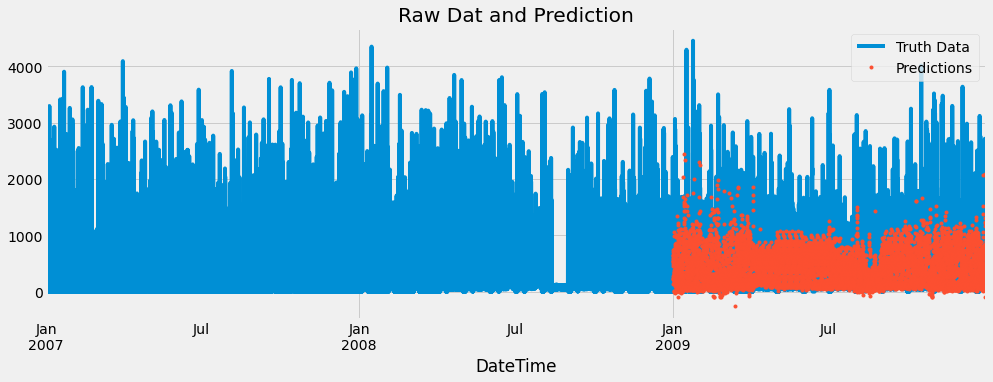

In [20]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Total_Usage']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

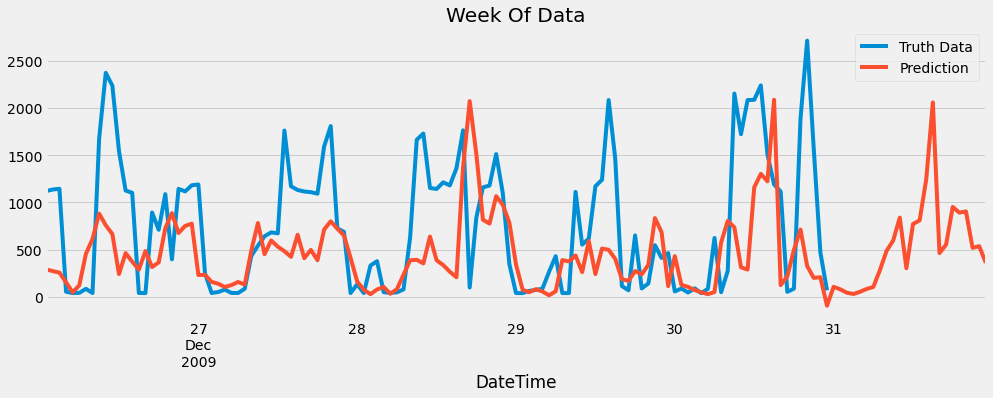

In [21]:
ax = df.loc[(df.index > '2009-12-26 ') & (df.index < '2009-12-31')]['Total_Usage'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '2009-12-26') & (df.index < '2010-01-04')]['prediction'] \
    .plot()
plt.legend(['Truth Data','Prediction'])

plt.show()

In [22]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2009-02-22    1053.437072
2009-12-24     922.595238
2009-07-02     858.858089
2009-04-02     858.676736
2009-11-18     791.362882
2009-01-16     781.589013
2009-10-17     780.416871
2009-08-03     773.956624
2009-01-03     752.827126
2009-01-18     748.408695
Name: error, dtype: float64

### Conclusio
- in order to improve the the performance of our forecast, we need to collect more data, espacially over several more years

### Outlook
- by collecting data from several households (intercontinental), many possibilities occurs, like managing power distribution more efficient based on time and trends